In [94]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [95]:
df = pd.read_csv('/content/sample_data/Housing.csv')
print(df)
df.head() # To get first n rows from the dataset default value of n is 5 
M=len(df) 
M

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

545

In [96]:
z= df.iloc[:,[0,1,2,3,4,10]]  # get input values from first column 
#y = df.iloc[:, 0]  # get output values from second column 
m = len(z) # Number of training examples 
print('Z = ', z[:10]) # Show only first 5 records 
#print('y = ', y[:10]) 
print('m = ', m) 
z.shape

Z =        price   area  bedrooms  bathrooms  stories  parking
0  13300000   7420         4          2        3        2
1  12250000   8960         4          4        4        3
2  12250000   9960         3          2        2        2
3  12215000   7500         4          2        2        3
4  11410000   7420         4          1        2        2
5  10850000   7500         3          3        1        2
6  10150000   8580         4          3        4        2
7  10150000  16200         5          3        2        0
8   9870000   8100         4          1        2        2
9   9800000   5750         3          2        4        1
m =  545


(545, 6)

In [97]:
# using the train test split function
z_train, z_test = train_test_split(z, random_state = 0, train_size = .8)

print(f"No. of training examples: {z_train.shape[0]}")
print(f"No. of testing examples: {z_test.shape[0]}")

#print(f"No. of training examples: {y_train.shape[0]}")
#print(f"No. of testing examples: {y_test.shape[0]}")

No. of training examples: 436
No. of testing examples: 109


In [98]:
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler

#scaler = StandardScaler()

scaler = MinMaxScaler()
z_train= scaler.fit_transform(z_train)
z_test= scaler.fit_transform(z_test)
print('z_train = ', z_train[:10]) # Show only first 5 records 
print('z_test = ', z_test[:10]) 

z_train =  [[0.         0.12419939 0.2        0.         0.         0.        ]
 [0.08181818 0.15065441 0.2        0.         0.         0.        ]
 [0.0969697  0.08382066 0.2        0.         0.         0.        ]
 [0.07272727 0.12280702 0.2        0.         0.         0.        ]
 [0.23939394 0.55861877 0.4        0.         0.         0.        ]
 [0.23030303 0.14842662 0.4        0.         0.33333333 0.        ]
 [0.24545455 0.13951546 0.4        0.         0.33333333 0.33333333]
 [0.3030303  0.55444166 0.6        0.5        0.33333333 0.66666667]
 [0.15757576 0.12559176 0.2        0.         0.         0.        ]
 [0.16363636 0.11723754 0.2        0.5        0.         0.        ]]
z_test =  [[0.27       0.2034632  0.5        0.         0.33333333 0.33333333]
 [0.41266667 0.69004329 0.5        0.         0.         0.66666667]
 [0.215      0.15670996 0.75       0.         0.33333333 0.        ]
 [0.49333333 1.         0.25       0.         0.         0.33333333]
 [0.11333333

In [99]:
X_train= z_train[:,1:6]  # get input values from first column 
y_train =z_train[:, 0]  # get output values from second column 
X_test= z_test[:,1:6]  # get input values from first column 
y_test =z_test[:, 0]  # get output values from second column 

print('X = ', X_train[:10]) # Show only first 5 records 
print('y ', y_train[:10]) 
X_train.shape


X =  [[0.12419939 0.2        0.         0.         0.        ]
 [0.15065441 0.2        0.         0.         0.        ]
 [0.08382066 0.2        0.         0.         0.        ]
 [0.12280702 0.2        0.         0.         0.        ]
 [0.55861877 0.4        0.         0.         0.        ]
 [0.14842662 0.4        0.         0.33333333 0.        ]
 [0.13951546 0.4        0.         0.33333333 0.33333333]
 [0.55444166 0.6        0.5        0.33333333 0.66666667]
 [0.12559176 0.2        0.         0.         0.        ]
 [0.11723754 0.2        0.5        0.         0.        ]]
y  [0.         0.08181818 0.0969697  0.07272727 0.23939394 0.23030303
 0.24545455 0.3030303  0.15757576 0.16363636]


(436, 5)

In [100]:
#Lets create a matrix with single column of ones 
X_0 = np.ones((436, 1)) 
X_2 = np.ones((109,1))


In [101]:
# Using reshape function convert X 1D array to 2D array of dimension 100X1 
X_1 = X_train.reshape(436,5) 
X_3 = X_test.reshape(109,5)

In [102]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column 
# This will be our final X matrix (feature matrix) 
X_train = np.hstack((X_0, X_1)) 
X_test = np.hstack((X_2, X_3))

In [103]:
theta = np.zeros(6) 
theta 

array([0., 0., 0., 0., 0., 0.])

In [104]:
def compute_cost(X, y, theta): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  predictions = X.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * np.sum(sqrErrors) 
 
  return J 

In [105]:
# Lets compute the cost for theta values 
cost = compute_cost(X_train, y_train, theta) 
print('The cost for given values of theta_0 =',cost) 

The cost for given values of theta_0 = 0.03841234407170959


In [106]:
def gradient_descent(X, X1, y, y1, theta, alpha, iterations): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(m x 1) 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
  alpha : Learning rate. Scalar value 
  iterations: No of iterations. Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
  ef gradient_descent(X, y, theta, alpha, iterations): 
  """ 
  cost_history = np.zeros(iterations) 
  cost_history2 = np.zeros(iterations) 
  lmbda_value = 1;


  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (1 /m) * (X.transpose().dot(errors) + lmbda_value *theta) ; 
    theta= theta - alpha*sum_delta; 
    cost_history[i] = compute_cost(X, y, theta)
    cost_history2[i] = compute_cost(X1, y1, theta) 
 
  return theta, cost_history , cost_history2

In [107]:
theta = [0.,0.,0.,0.,0.,0.] 
iterations = 100; 
alpha =0.01;

In [108]:
theta, cost_history_a, cost_history_a2 = gradient_descent(X_train, X_test, y_train, y_test, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history_a[-1],cost_history_a2[-1]) 

Final value of theta = [0.12431489 0.03821881 0.0550275  0.0316778  0.04683365 0.04174956]
cost_history = 0.011175046022406496 0.0029404436185396956


Text(0.5, 1.0, 'Convergence of gradient descent')

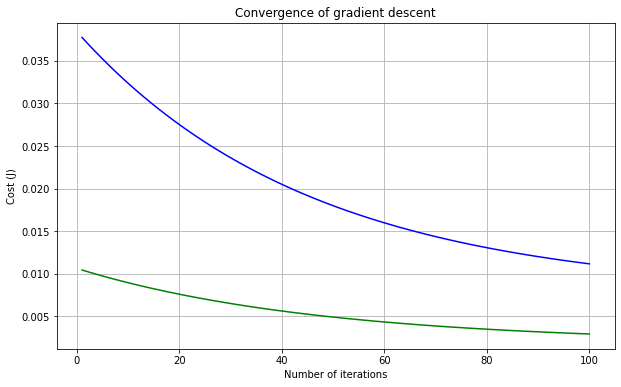

In [109]:
plt.plot(range(1, iterations + 1),cost_history_a, color='blue') 
plt.plot(range(1, iterations + 1),cost_history_a2, color='green') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 